In [5]:

import numpy as np
import pandas as pd

# Load the CSV file with the correct encoding (e.g., 'latin1' or 'ISO-8859-1')
df = pd.read_csv('C:/Users/suchi/ASW. PROJECT/SMS SPAM CLASSIFIER/spam.csv', encoding='latin1')

# Save it back as a UTF-8 encoded CSV file
df.to_csv('C:/Users/suchi/ASW. PROJECT/SMS SPAM CLASSIFIER/spam_utf8.csv', encoding='utf-8', index=False)


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3264,spam,"44 7732584351, Do you want a New Nokia 3510i c...",NaN,NaN,NaN
1031,ham,Yup bathe liao...,NaN,NaN,NaN
5248,ham,U come n search tat vid..not finishd..,NaN,NaN,NaN
3605,ham,"That means you got an A in epi, she.s fine. Sh...",NaN,NaN,NaN
4874,ham,I know dat feelin had it with Pete! Wuld get w...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [11]:

# 1. Data cleaning
# 2. Data Analysis
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


In [13]:
#1. DATA CLEANING



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
## drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
1697,ham,Hai priya are you right. What doctor said pa. ...
2494,ham,You at mu? You should try to figure out how mu...
2349,ham,Yar else i'll thk of all sorts of funny things.
260,ham,Yup
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...


In [21]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1967,ham,Even i cant close my eyes you are in me our va...
1086,ham,I don't think he has spatula hands!
2122,ham,Do you know when the result.
807,ham,Boooo you always work. Just quit.
3572,spam,You won't believe it but it's true. It's Incre...


In [23]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
# check for duplicate values
df.duplicated().sum()

403

In [28]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [29]:

df.duplicated().sum()


0

In [30]:

df.shape

(5169, 2)

In [31]:
#3. DATA ANALYSIS

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df['target'].value_counts()



target
0    4516
1     653
Name: count, dtype: int64

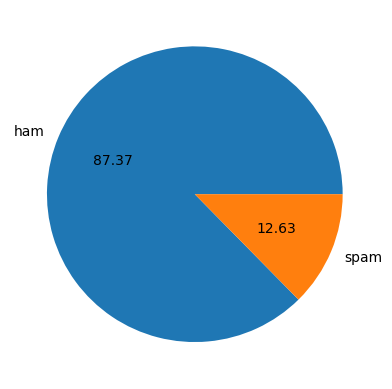

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
# Data is imbalanced


In [36]:
import nltk

In [37]:
!pip install nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suchi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
df['num_characters'] = df['text'].apply(len)

In [51]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [53]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [54]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
import seaborn as sns

C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

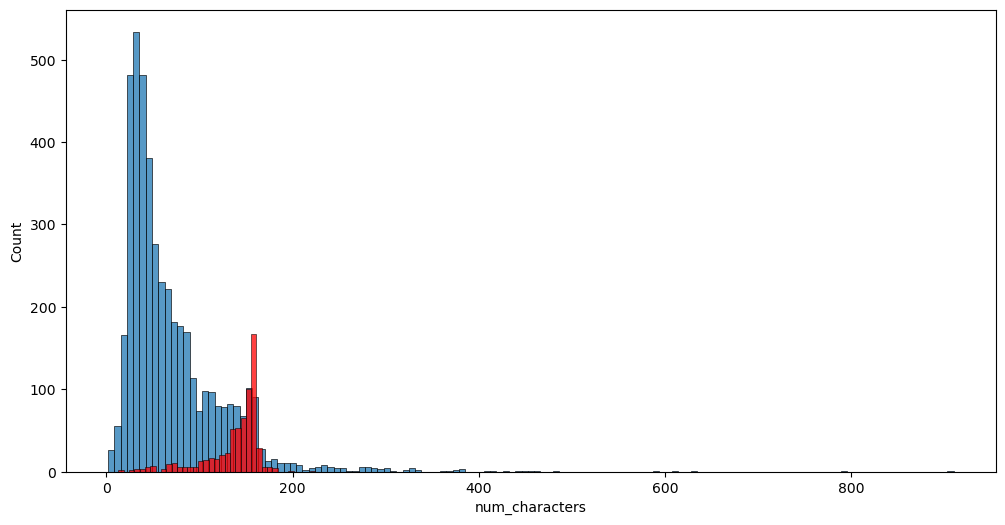

In [62]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

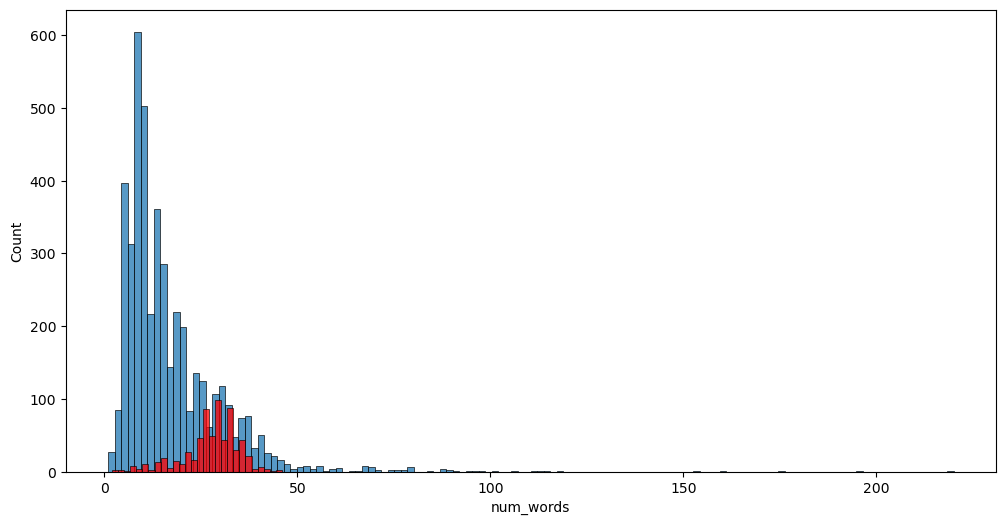

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


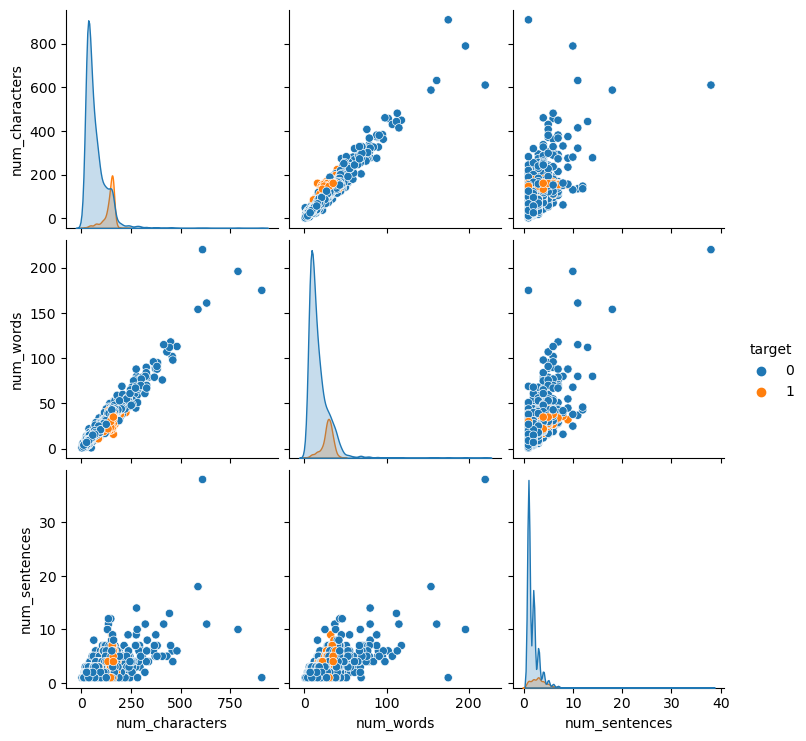

In [65]:
sns.pairplot(df,hue='target')

In [71]:
#3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [148]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [170]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [166]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [144]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('eating')


'eat'

In [174]:
df['transformed_text'] = df['text'].apply(transform_text)

In [182]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [184]:
#word cloud of spam messages

In [186]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 416.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 437.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 450.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 458.0 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 456.4 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 479.2 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 497.3 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 

In [198]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [200]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

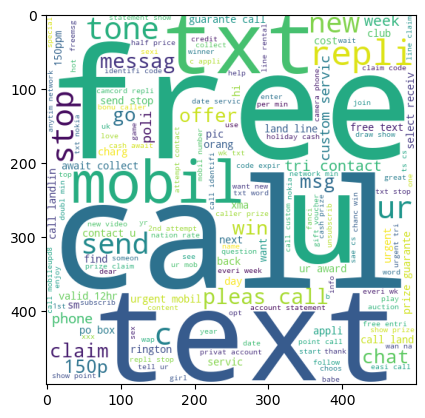

In [196]:
plt.imshow(spam_wc)

In [202]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

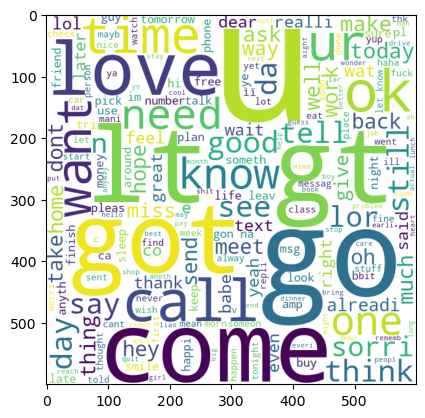

In [204]:
plt.imshow(spam_wc)

In [206]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [208]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [210]:
len(spam_corpus)

9939

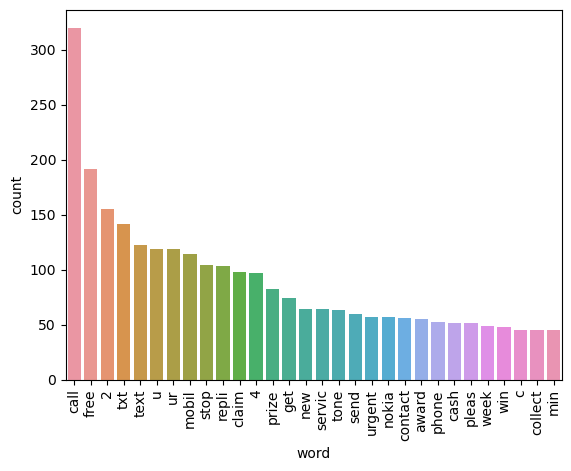

In [224]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming spam_corpus is a list or series of words or tokens
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using sns.barplot with keyword arguments
sns.barplot(x='word', y='count', data=common_words_df)

plt.xticks(rotation='vertical')
plt.show()

In [226]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [228]:
len(ham_corpus)

35404

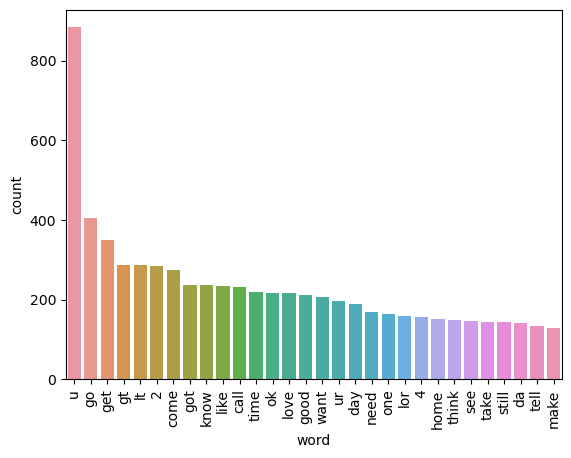

In [230]:
from collections import Counter

# Assuming spam_corpus is a list or series of words or tokens
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using sns.barplot with keyword arguments
sns.barplot(x='word', y='count', data=common_words_df)

plt.xticks(rotation='vertical')
plt.show()